In [11]:
from trace_IO import *
from OF_trigger import *
from OF import OptimumFilter  # Replace with actual module path

import matplotlib.pyplot as plt
import numpy as np
import time


sampling_frequency = 3906250

data = np.load("/ceph/dwong/delight/Ka_traces_1.npz")

template = np.load("../templates/template_K_alpha_tight.npy")
noise_psd = np.load("../templates/noise_psd_from_MMC.npy")
loaded_traces = data['data']
data.close()


In [2]:
import yaml
import numpy as np
import zstandard as zstd
import os
from TraceSimulator import TraceSimulator

def read_yaml_to_dict(file_path):
    with open(file_path, 'r') as file:
        config_dict = yaml.safe_load(file)
    return config_dict

config = read_yaml_to_dict('../archive/config.yaml')
ts = TraceSimulator(config)


In [66]:
trace = ts.generate(E=100, x=-40, y=80, z=-1800, no_noise=False, type_recoil='NR', quantize=True, phonon_only=False)

In [67]:
# Parameters
energy = 150
n_sets = 100
sampling_frequency = 3906250

# Load template and noise PSD
template = np.load("../templates/template_K_alpha_tight.npy")
noise_psd = np.load("../templates/noise_psd_from_MMC.npy")

# Initialize Optimum Filter
trigger = OFtrigger(template, noise_psd, sampling_frequency)
of = OptimumFilter(template, noise_psd, sampling_frequency)


In [ ]:
# Assuming you have already initialized:
# - `trace` as shape (1, 54, 32768) from a simulator
# - `OFtrigger` object as `trigger`
ampl = []
for i in range(trace.shape[1]):
    trace_single = trace[0][i]  # shape: (32768,)
    trace_offset = trace_single[:2048]
    
    mean_val = np.mean(trace_offset)
    std_val = np.std(trace_offset)
    
    amp, chi2, _ = of.fit_with_shift(trace_single)
    ampl.append(amp)
    
    print(f"Trace {i:2d}, Amp: {amp: .2f}, Chi²: {chi2: .2f}")


Trace  0 | Mean:  0.5034, Std:  5.2831, Amp:  2.22, Chi²:  0.87
Trace  1 | Mean:  0.3008, Std:  5.1838, Amp: -2.16, Chi²:  0.87
Trace  2 | Mean: -0.9263, Std:  5.1902, Amp:  2.10, Chi²:  0.87
Trace  3 | Mean: -1.3726, Std:  5.1815, Amp: -2.36, Chi²:  0.87
Trace  4 | Mean:  0.0737, Std:  5.2413, Amp:  2.36, Chi²:  0.87
Trace  5 | Mean:  1.0576, Std:  5.1410, Amp: -2.64, Chi²:  0.87
Trace  6 | Mean:  1.3877, Std:  5.2625, Amp: -2.18, Chi²:  0.87
Trace  7 | Mean:  1.6362, Std:  5.3058, Amp:  2.49, Chi²:  0.87
Trace  8 | Mean:  1.0439, Std:  5.2385, Amp:  2.68, Chi²:  0.87
Trace  9 | Mean: -0.7935, Std:  5.2317, Amp: -2.41, Chi²:  0.87
Trace 10 | Mean:  0.0483, Std:  5.1098, Amp: -2.24, Chi²:  0.87
Trace 11 | Mean: -0.2046, Std:  4.9622, Amp: -2.29, Chi²:  0.87
Trace 12 | Mean:  0.7119, Std:  5.1089, Amp: -2.34, Chi²:  0.87
Trace 13 | Mean: -0.5586, Std:  5.3388, Amp: -2.36, Chi²:  0.87
Trace 14 | Mean: -0.1064, Std:  5.1501, Amp: -1.91, Chi²:  0.87
Trace 15 | Mean:  1.3447, Std:  5.6349, 

In [69]:
np.max(ampl)

24.16868893010924

In [70]:
import matplotlib.pyplot as plt

def plot_trace_set(trace_set, offset=50):
    """
    Plot a single trace set (shape: 54 x N) with vertical offsets.

    Parameters:
    - trace_set: ndarray, shape (54, N)
    - offset: float, vertical offset between channels
    """
    n_channels, n_samples = trace_set.shape

    for i in range(n_channels):
        color = 'r' if i > 44 else 'b'
        plt.plot(np.arange(n_samples), trace_set[i] + i * offset, color=color, lw=0.2)

    plt.xlabel("Sample Index")
    plt.yticks([])
    plt.ylim(-10, offset * n_channels)
    plt.title("Trace Set")
    plt.grid(False)
    plt.tight_layout()
    plt.show()


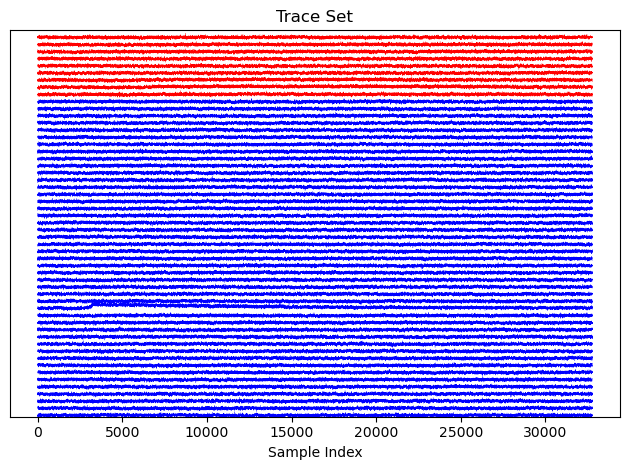

In [71]:
plot_trace_set(trace[0])

In [59]:
trace.shape

(1, 54, 32768)